The characteristic shape of the solitary wave solution (soliton) is

$$ \phi (x,t)= \frac{c}{2} \, \mathrm {sech}^{2}\left[ \frac{\sqrt c}{2}(x-c\,t-a) \right] $$

$$u(t+1) = u-(\partial^3 x u+6u \partial x u)\Delta t$$

second order:
 
$$\frac{\partial u}{\partial t} = \frac{u(t+1)-u(t)}{\Delta t}$$

$$\frac{\partial u}{\partial x} = \frac{-\frac{1}{2}u(x-1)+\frac{1}{2}u(x+1)}{\Delta x}$$

$$\frac{\partial^3 u}{\partial x^3} = \frac{-\frac{1}{2}u(x-2)+u(x-1)-u(x+1)+\frac{1}{2}u(x+2)}{\Delta x^3}$$

$$ \partial_{t} \phi + \partial_{x}^{3} \phi + 6\,\phi \, \partial_{x} \phi =0 $$


fourth order:

$$\frac{\partial u}{\partial t} = \frac{-\frac{25}{12}u(t)+4u(t+1)-3u(t+2)+\frac{4}{3}u(t+3)-\frac{1}{4}u(t+4)}{\Delta t}$$

$$\frac{\partial u}{\partial x} = \frac{\frac{1}{12}u(x-2)-\frac{2}{3}u(x-1)+\frac{2}{3}u(x+1)-\frac{1}{12}u(x+2)}{\Delta x}$$

$$\frac{\partial^3 u}{\partial x^3} = \frac{\frac{1}{8}u(x-3)-u(x-2)+\frac{13}{8}u(x-1)-\frac{13}{8}u(x+1)+u(x+2)-\frac{1}{8}u(x+3)}{\Delta x^3}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class kdv:
    """
    """
    def __init__(self, x, t, c, a):
        """
        """
        self.x = x
        self.t = t
        self.c = c
        self.a = a

        self.kdv_soliton()
        
        return

    def kdv_soliton(self):
        """ solution to the KdV equation 

            $$ u_t + 6 u u_x + u_xxx = 0 $$

        is a solitary wave moving with speed $c$
        """
        x = self.x
        t = 0.0
        c = self.c
        a = self.a

        # Calculates a
        if a is None: a = np.median(x)  # peak in middle of region

        # Calculating characteristic shape of solitary wave solution
        arg = 0.5*np.sqrt(c) * (x - c*t - a)
        sech = 1.0 / np.cosh(arg)
        u0 = 0.5*c * sech**2  
        
        self.theoredical = u0
        self.u = u0
        return self

    def kdv_stepper_2(self, save_stride=10):
        """
        PDE KdV equation: integrate initial x in time to 2nd degree accuracy in space and time.
        """
        # copy u
        u = self.u.copy()
        x = self.x.copy()
        t = self.t.copy()

        # calculates dx and dt 
        dx = x[1]-x[0]
        dt = t[1]-t[0]

        # calculates denominator
        dtdx = dt/dx
        dtdx3 = dt/dx/dx/dx
        
        # calculate momentum
        momentum = np.zeros( len(t) )
        momentum[0] = np.sum(u**2)
        stack = [u.copy()]
        
        #Calculate Initial Energy
        energy = np.zeros(len(t))
        du_dx1c = (+0.5*np.roll(u, -1) -0.5*np.roll(u, 1))/dx
        energy[0] = np.sum(2*u**3-(du_dx1c)**2)
        print(energy[0])
        for indx,tval in enumerate(t[1:]):
            
            #Second Degree

            #First Spacial Dirivative
            du_dx1c = +0.5*np.roll(u, -1) -0.5*np.roll(u, 1)

            # Third Spacial Dirivative
            du_dx3c = -0.5*np.roll(u, 2) +1.0*np.roll(u, 1) -1.0*np.roll(u, -1) +0.5*np.roll(u, -2)

            u = u - 6*u*du_dx1c*dtdx - du_dx3c*dtdx3    

            #Momentum
            momentum[indx+1] = np.sum(u*u)
            if (indx%save_stride == 0): stack.append(u.copy())

            #Energy
            energy[indx+1] = np.sum(2*u**3-(du_dx1c/dx)**2)

        return u, momentum, stack, energy

    def kdv_stepper_4(self, save_stride=10):
        """
        PDE KdV equation: integrate initial x in time to 2nd degree accuracy in space and time.
        """
        # copy u
        u = self.u.copy()
        x = self.x.copy()
        t = self.t.copy()

        # calculates dx and dt 
        dx = x[1]-x[0]
        dt = t[1]-t[0]

        # calculates denominator
        dtdx = dt/dx
        dtdx3 = dt/dx/dx/dx
        
        # calculate momentum
        momentum = np.zeros( len(t) )
        momentum[0] = np.sum(u**2)
        stack = [u.copy()]
        
        #Calculate Initial Energy
        energy = np.zeros(len(t))
        du_dx1c = (+0.5*np.roll(u, -1) -0.5*np.roll(u, 1))/dx
        energy[0] = np.sum(2*u**3-(du_dx1c)**2)
        print(energy[0])
        for indx,tval in enumerate(t[1:]):

            #Fourth Degree
        
            #First Spacial Dirivative
            self.du_dx1c = +(1/12)*np.roll(u, 2) -(2/3)*np.roll(u, 1) +(2/3)*np.roll(u, -1)-(1/12)*np.roll(u, -2)

            # Third Spacial Dirivative
            du_dx3c = (1/8)*np.roll(u, 3) -1.0*np.roll(u, 2) +(13/8)*np.roll(u, 1) -(13/8)*np.roll(u, -1) 

            u = u - 6*u*du_dx1c*dtdx - du_dx3c*dtdx3    

            #Momentum
            momentum[indx+1] = np.sum(u*u)
            if (indx%save_stride == 0): stack.append(u.copy())

            #Energy
            energy[indx+1] = np.sum(2*u**3-(du_dx1c/dx)**2)

        return u, momentum, stack, energy

0.5548538130914585
0.5548538130914585


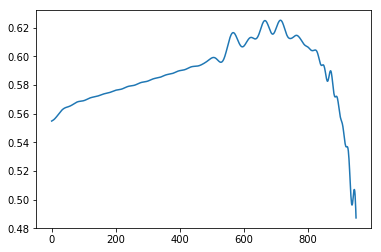

In [3]:
x = np.arange(0.0, 50.0, 0.75)
t = np.arange(0, 19.0, 0.020)
obj = kdv(x, t, c=1.0, a=None)
u, momentum, stack, energy = obj.kdv_stepper_2()
plt.plot(energy)
print(energy[0])